In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
import shap

In [2]:
import os
for dirname, _, filenames in os.walk('Input/'):
    for filename in filenames:
        print(filename)
        print(os.path.join(dirname, filename))

Kaggle_Sirio_Libanes_ICU_Prediction.csv
Input/COVID-19 - Clinical Data to assess diagnosis\Kaggle_Sirio_Libanes_ICU_Prediction.csv
Kaggle_Sirio_Libanes_ICU_Prediction.xlsx
Input/COVID-19 - Clinical Data to assess diagnosis\Kaggle_Sirio_Libanes_ICU_Prediction.xlsx
diagnosis-of-covid-19-and-its-clinical-spectrum.csv
Input/UNCOVER COVID-19 Challenge\diagnosis-of-covid-19-and-its-clinical-spectrum.csv


- Can we predict which inpatient will need intensive care unit (ICU)?

- Can we predict which inpatient will need intensive care unit (ICU) using only (Vital signs + Demographics)?

- Can we predict which inpatient will need intensive care unit (ICU) using only (Laboratory exams + Demographics)?

- Can we predict which inpatient will need intensive care unit (ICU) using only (Comorbities + Demographics)?

- What is the best time window for each previous question. Justify.

In [3]:
pd.set_option('display.max_columns', 240)
pd.set_option('display.max_rows', 240)
raw_data = pd.read_csv('Input/COVID-19 - Clinical Data to assess diagnosis/Kaggle_Sirio_Libanes_ICU_Prediction.csv', sep = ';', decimal='.')
print(raw_data.shape)
raw_data.head()

(1925, 231)


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER ALBUMIN_MEDIAN ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0            NaN          NaN          NaN   
1                0.0    1.0            NaN          NaN          NaN   
2                0.0    1.0    0,605263158  0,605263158  0,605263158   
3                0.0    1.0            NaN          NaN          NaN   
4                0.0    1.0              0            0            0   

   ALBUMIN_MAX  ALBUMIN_DIFF BE_ARTERIAL_MEDIAN BE_ARTERIAL_MEAN  \
0          NaN           NaN                NaN              NaN   
1          NaN           NaN                NaN              NaN   
2  0,605263158          -1.0                 -1               -1   
3          NaN           NaN                NaN              NaN   
4            0          -1.0       -0,871657754     -0,871657754   

  BE_ARTERIAL_MIN BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF BE_VENOUS_MEDIAN  \
0             NaN             NaN               NaN              NaN   
1             NaN             NaN               NaN              NaN   
2              -1              -1              -1.0               -1   
3             NaN             NaN               NaN              NaN   
4    -0,871657754    -0,871657754              -1.0     -0,863874346   

  BE_VENOUS_MEAN BE_VENOUS_MIN BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0            NaN           NaN           NaN             NaN   
1            NaN           NaN           NaN             NaN   
2             -1            -1            -1            -1.0   
3            NaN           NaN           NaN             NaN   
4   -0,863874346  -0,863874346  -0,863874346            -1.0   

  BIC_ARTERIAL_MEDIAN BIC_ARTERIAL_MEAN BIC_ARTERIAL_MIN BIC_ARTERIAL_MAX  \
0                 NaN               NaN              NaN              NaN   
1                 NaN               NaN              NaN              NaN   
2        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
3                 NaN               NaN              NaN              NaN   
4        -0,317073171      -0,317073171     -0,317073171     -0,317073171   

   BIC_ARTERIAL_DIFF BIC_VENOUS_MEDIAN BIC_VENOUS_MEAN BIC_VENOUS_MIN  \
0                NaN               NaN             NaN            NaN   
1                NaN               NaN             NaN            NaN   
2               -1.0      -0,317073171    -0,317073171   -0,317073171   
3                NaN               NaN             NaN            NaN   
4               -1.0      -0,414634146    -0,414634146   -0,414634146   

  BIC_VENOUS_MAX  BIC_VENOUS_DIFF BILLIRUBIN_MEDIAN BILLIRUBIN_MEAN  \
0            NaN              NaN               NaN             NaN   
1            NaN              NaN               NaN             NaN   
2   -0,317073171   

### There are 4 groups of features:

##### Demographics ( No–:3 )
- Percentil Age.
- Above 65 years old.
- Gender.

##### Comorbities ( No–:9 )

- The features were created based on the historical ICD-10 codes of each patient using the Charlson and Elixhauser range of comorbid conditions (https://pubmed.ncbi.nlm.nih.gov/16224307/ https://pubmed.ncbi.nlm.nih.gov/9431328/). Here, we have chosen the comorbid groups related to serious adverse outcomes in COVID-19.

##### Vital Signs ( No–:36 )

- Diastolic blood pressure.
- Systolic blood pressure.
- Heart rate.
- Respiratory rate.
- Temperature.
- Oxygen saturation.

##### Laboratory ( No–:180 )

- There are 36 laboratorys types.

### The outcome variable is ICU admission.

##### The following features were created for each vital signs and time window:

- mean
- median
- min
- max
- amplitude (diff): max-min
- relative amplitude (rel): amplitude/median

##### The following features were created for each laboratory exam and time window:

- mean
- median
- min
- max
- amplitude (diff): max-min

In [4]:
comorb_lst = [i for i in raw_data.columns if "DISEASE" in i]
comorb_lst.extend(["HTN", "IMMUNOCOMPROMISED", "OTHER"])

demo_lst = [i for i in raw_data.columns if "AGE_" in i]
demo_lst.append("GENDER")


vitalSigns_lst = raw_data.iloc[:,193:-2].columns.tolist()

lab_lst = raw_data.iloc[:,13:193].columns.tolist()

In [5]:
print(f"Number of Comorbities features: {len(comorb_lst)}") 
print(f"Number of Demographics features: {len(demo_lst)}") 
print(f"Number of Vital Signs features: {len(vitalSigns_lst)}") 
print(f"Number of Laboratory features: {len(lab_lst)}")

Number of Comorbities features: 9
Number of Demographics features: 3
Number of Vital Signs features: 36
Number of Laboratory features: 180


##### ID is a identification number for each patient.

In [6]:
print(f"Number of lines in the dataset: {len(raw_data)}")
print(f"Number of inpatients: {len(raw_data.PATIENT_VISIT_IDENTIFIER.unique())}")

Number of lines in the dataset: 1925
Number of inpatients: 385


From hospital admission, there are five time windows. Please, observe that there is a flag pointing out whether the patient was or not admitted in the ICU as well as his/her vital signs and laboratory results in that window.

In [7]:
print(raw_data.WINDOW.unique())

['0-2' '2-4' '4-6' '6-12' 'ABOVE_12']


In [8]:
raw_data.groupby("PATIENT_VISIT_IDENTIFIER", as_index = False).agg({"ICU":(list), "WINDOW":list}).iloc[[13,14,15,41,0,2]]

PATIENT_VISIT_IDENTIFIER              ICU                           WINDOW
13                        13  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
14                        14  [0, 0, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
15                        15  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
41                        41  [1, 1, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
0                          0  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
2                          2  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]

In [9]:
aux = abs(raw_data.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum()-5)
aux = aux.value_counts().reset_index()
aux.sort_values(by = "index", inplace = True)
aux.reset_index(drop = True, inplace = True)

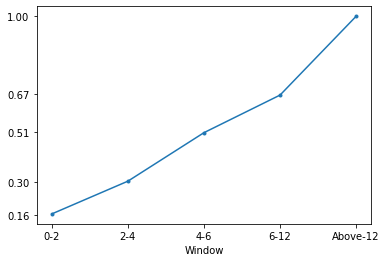

In [10]:
tot_icu_inpatients = aux.ICU[0:5].sum()
y = aux.ICU[0:5].cumsum()/tot_icu_inpatients
plt.plot(y, marker = ".")

plt.ylabel
plt.xlabel("Window")
plt.yticks(round(y,2) )
plt.xticks([0,1,2,3,4], ["0-2", "2-4", "4-6", "6-12", "Above-12"])
plt.show()

In [11]:
raw_data.isna().sum().head(20)

PATIENT_VISIT_IDENTIFIER       0
AGE_ABOVE65                    0
AGE_PERCENTIL                  0
GENDER                         0
DISEASE GROUPING 1             5
DISEASE GROUPING 2             5
DISEASE GROUPING 3             5
DISEASE GROUPING 4             5
DISEASE GROUPING 5             5
DISEASE GROUPING 6             5
HTN                            5
IMMUNOCOMPROMISED              5
OTHER                          5
ALBUMIN_MEDIAN              1104
ALBUMIN_MEAN                1104
ALBUMIN_MIN                 1104
ALBUMIN_MAX                 1104
ALBUMIN_DIFF                1104
BE_ARTERIAL_MEDIAN          1104
BE_ARTERIAL_MEAN            1104
dtype: int64

In [12]:
raw_data.dtypes.head(20)

PATIENT_VISIT_IDENTIFIER      int64
AGE_ABOVE65                   int64
AGE_PERCENTIL                object
GENDER                        int64
DISEASE GROUPING 1          float64
DISEASE GROUPING 2          float64
DISEASE GROUPING 3          float64
DISEASE GROUPING 4          float64
DISEASE GROUPING 5          float64
DISEASE GROUPING 6          float64
HTN                         float64
IMMUNOCOMPROMISED           float64
OTHER                       float64
ALBUMIN_MEDIAN               object
ALBUMIN_MEAN                 object
ALBUMIN_MIN                  object
ALBUMIN_MAX                  object
ALBUMIN_DIFF                float64
BE_ARTERIAL_MEDIAN           object
BE_ARTERIAL_MEAN             object
dtype: object

First, we'll remove the ordinal suffixes from the AGE_PERCENTIL column, so that we are left with just numbers. A simple replace to get rid of all non-digits will suffice.

In [13]:
raw_data['AGE_PERCENTIL'] = raw_data['AGE_PERCENTIL'].replace(r'[^0-9]', '', regex=True)
raw_data['AGE_PERCENTIL'].value_counts()

90    340
20    215
30    205
10    205
40    200
70    195
50    190
80    190
60    185
Name: AGE_PERCENTIL, dtype: int64

In [14]:
raw_data.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1            60       0   
1                         0            1            60       0   
2                         0            1            60       0   
3                         0            1            60       0   
4                         0            1            60       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER ALBUMIN_MEDIAN ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0            NaN          NaN          NaN   
1                0.0    1.0            NaN          NaN          NaN   
2                0.0    1.0    0,605263158  0,605263158  0,605263158   
3                0.0    1.0            NaN          NaN          NaN   
4                0.0    1.0              0            0            0   

   ALBUMIN_MAX  ALBUMIN_DIFF BE_ARTERIAL_MEDIAN BE_ARTERIAL_MEAN  \
0          NaN           NaN                NaN              NaN   
1          NaN           NaN                NaN              NaN   
2  0,605263158          -1.0                 -1               -1   
3          NaN           NaN                NaN              NaN   
4            0          -1.0       -0,871657754     -0,871657754   

  BE_ARTERIAL_MIN BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF BE_VENOUS_MEDIAN  \
0             NaN             NaN               NaN              NaN   
1             NaN             NaN               NaN              NaN   
2              -1              -1              -1.0               -1   
3             NaN             NaN               NaN              NaN   
4    -0,871657754    -0,871657754              -1.0     -0,863874346   

  BE_VENOUS_MEAN BE_VENOUS_MIN BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0            NaN           NaN           NaN             NaN   
1            NaN           NaN           NaN             NaN   
2             -1            -1            -1            -1.0   
3            NaN           NaN           NaN             NaN   
4   -0,863874346  -0,863874346  -0,863874346            -1.0   

  BIC_ARTERIAL_MEDIAN BIC_ARTERIAL_MEAN BIC_ARTERIAL_MIN BIC_ARTERIAL_MAX  \
0                 NaN               NaN              NaN              NaN   
1                 NaN               NaN              NaN              NaN   
2        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
3                 NaN               NaN              NaN              NaN   
4        -0,317073171      -0,317073171     -0,317073171     -0,317073171   

   BIC_ARTERIAL_DIFF BIC_VENOUS_MEDIAN BIC_VENOUS_MEAN BIC_VENOUS_MIN  \
0                NaN               NaN             NaN            NaN   
1                NaN               NaN             NaN            NaN   
2               -1.0      -0,317073171    -0,317073171   -0,317073171   
3                NaN               NaN             NaN            NaN   
4               -1.0      -0,414634146    -0,414634146   -0,414634146   

  BIC_VENOUS_MAX  BIC_VENOUS_DIFF BILLIRUBIN_MEDIAN BILLIRUBIN_MEAN  \
0            NaN              NaN               NaN             NaN   
1            NaN              NaN               NaN             NaN   
2   -0,317073171   

In [15]:
def get_na_table(df):
    na_counts = pd.DataFrame([(x, df[x].isna().sum(), df[x].isna().sum()/len(df)) for x in df.columns])
    na_counts.columns = ['Variable', 'NAs', 'Percentage']
    return na_counts.sort_values(by=['NAs'], ascending=False)

In [16]:
print(get_na_table(raw_data).shape)
get_na_table(raw_data).head()

(231, 3)


Variable   NAs  Percentage
115    P02_VENOUS_MIN  1104    0.573506
96     LEUKOCYTES_MAX  1104    0.573506
124  PC02_VENOUS_MEAN  1104    0.573506
125   PC02_VENOUS_MIN  1104    0.573506
126   PC02_VENOUS_MAX  1104    0.573506

A lot of measurments are missing. However the authors of the dataset pointed out that we can use the measurments from neighboring windows.

In [17]:
raw_data = raw_data.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW']).groupby('PATIENT_VISIT_IDENTIFIER', as_index=False).fillna(method='ffill').fillna(method='bfill')

In [18]:
raw_data.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1            60       0   
1                            0            1            60       0   
2                            0            1            60       0   
3                            0            1            60       0   
4                            0            1            60       0   
...                        ...          ...           ...     ...   
1920                       384            0            50       1   
1921                       384            0            50       1   
1922                       384            0            50       1   
1923                       384            0            50       1   
1924                       384            0            50       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER ALBUMIN_MEDIAN ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0    0,605263158  0,605263158  0,605263158   
1                   0.0    1.0    0,605263158  0,605263158  0,605263158   
2                   0.0    1.0    0,605263158  0,605263158  0,605263158   
3                   0.0    1.0    0,605263158  0,605263158  0,605263158   
4                   0.0    1.0              0            0            0   
...                 ...    ...            ...          ...          ...   
1920                0.0    1.0    0,605263158  0,605263158  0,605263158   
1921                0.0    1.0    0,605263158  0,605263158  0,605263158   
1922                0.0    1.0    0,605263158  0,605263158  0,605263158   
1923                0.0    1.0    0,605263158  0,605263158  0,605263158   
1924                0.0    1.0    0,605263158  0,605263158  0,605263158   

      ALBUMIN_MAX  ALBUMIN_DIFF BE_ARTERIAL_MEDIAN BE_ARTERIAL_MEAN  \
0     0,605263158          -1.0                 -1               -1   
1     0,605263158          -1.0                 -1               -1   
2     0,605263158          -1.0                 -1               -1   
3     0,605263158          -1.0                 -1               -1   
4               0          -1.0       -0,871657754     -0,871657754   
...           ...           ...                ...              ...   
1920  0,605263158          -1.0                 -1               -1   
1921  0,605263

In [19]:
raw_data_change = raw_data.iloc[:,4:229]
raw_data_change.head()

DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER ALBUMIN_MEDIAN ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0    0,605263158  0,605263158  0,605263158   
1                0.0    1.0    0,605263158  0,605263158  0,605263158   
2                0.0    1.0    0,605263158  0,605263158  0,605263158   
3                0.0    1.0    0,605263158  0,605263158  0,605263158   
4                0.0    1.0              0            0            0   

   ALBUMIN_MAX  ALBUMIN_DIFF BE_ARTERIAL_MEDIAN BE_ARTERIAL_MEAN  \
0  0,605263158          -1.0                 -1               -1   
1  0,605263158          -1.0                 -1               -1   
2  0,605263158          -1.0                 -1               -1   
3  0,605263158          -1.0                 -1               -1   
4            0          -1.0       -0,871657754     -0,871657754   

  BE_ARTERIAL_MIN BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF BE_VENOUS_MEDIAN  \
0              -1              -1              -1.0               -1   
1              -1              -1              -1.0               -1   
2              -1              -1              -1.0               -1   
3              -1              -1              -1.0               -1   
4    -0,871657754    -0,871657754              -1.0     -0,863874346   

  BE_VENOUS_MEAN BE_VENOUS_MIN BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0             -1            -1            -1            -1.0   
1             -1            -1            -1            -1.0   
2             -1            -1            -1            -1.0   
3             -1            -1            -1            -1.0   
4   -0,863874346  -0,863874346  -0,863874346            -1.0   

  BIC_ARTERIAL_MEDIAN BIC_ARTERIAL_MEAN BIC_ARTERIAL_MIN BIC_ARTERIAL_MAX  \
0        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
1        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
2        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
3        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
4        -0,317073171      -0,317073171     -0,317073171     -0,317073171   

   BIC_ARTERIAL_DIFF BIC_VENOUS_MEDIAN BIC_VENOUS_MEAN BIC_VENOUS_MIN  \
0               -1.0      -0,317073171    -0,317073171   -0,317073171   
1               -1.0      -0,317073171    -0,317073171   -0,317073171   
2               -1.0      -0,317073171    -0,317073171   -0,317073171   
3               -1.0      -0,317073171    -0,317073171   -0,317073171   
4               -1.0      -0,414634146    -0,414634146   -0,414634146   

  BIC_VENOUS_MAX  BIC_VENOUS_DIFF BILLIRUBIN_MEDIAN BILLIRUBIN_MEAN  \
0   -0,317073171             -1.0      -0,938949939    -0,938949939   
1   -0,317073171             -1.0      -0,938949939    -0,938949939   
2   -0,317073171             -1.0      -0,938949939    -0,938949939   
3   -0,317073171             -1.0      -0,938949939    -0,938949939   
4   -0,414634146             -1.0       -0,97906855     -0,97906855   

  BILLIRUBIN_MIN BILLIRUBIN_MAX  BILLIRUBIN_DIFF BLAST_MEDIAN BLAST_MEAN  \
0   -0,938949939   -0,938949939             -1.0           -1         -1   
1   -0,938949939   -0,938949939             -1.0  

In [20]:
modData = raw_data_change.apply(lambda col: col.apply(lambda x : float(str(x).replace(",","."))))

In [21]:
modData

DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0        0.605263      0.605263     0.605263   
1                   0.0    1.0        0.605263      0.605263     0.605263   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0        0.605263      0.605263     0.605263   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1920                0.0    1.0        0.605263      0.605263     0.605263   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0        0.605263      0.605263     0.605263   
1923                0.0    1.0        0.605263      0.605263     0.605263   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0        0.605263          -1.0           -1.000000         -1.000000   
1        0.605263          -1.0           -1.000000         -1.000000   
2        0.605263          -1.0           -1.000000         -1.000000   
3        0.605263          -1.0           -1.000000         -1.000000   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1920     0.605263          -1.0           -1.000000         -1.000000   
1921     0.605263          -1.0           -1.000000         -1.000000   
1922     0.605263          -1.0           -1.000000         -1.000000   
1923     0.605263          -1.0           -1.000000         -1.000000   
1924     0.605263          -1.0           -1.000000         -1.000000   

      BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0           -1.000000        -1.000000              -1.0         -1.000000   
1           -1.000000        -1.000000              -1.0         -1.000000   
2           -1.000000        -1.000000              -1.0         -1.000000   
3           -1.000000        -1.000000              -1.0         -1.000000   
4           -0.871658        -0.871658              -1.0         -0.863874   
...               ...              ...    

In [22]:
#raw_data["BE_VENOUS_MAX"].apply(lambda x : float(str(x).replace(",",".")))

In [23]:
raw_data.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1            60       0   
1                         0            1            60       0   
2                         0            1            60       0   
3                         0            1            60       0   
4                         0            1            60       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER ALBUMIN_MEDIAN ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0    0,605263158  0,605263158  0,605263158   
1                0.0    1.0    0,605263158  0,605263158  0,605263158   
2                0.0    1.0    0,605263158  0,605263158  0,605263158   
3                0.0    1.0    0,605263158  0,605263158  0,605263158   
4                0.0    1.0              0            0            0   

   ALBUMIN_MAX  ALBUMIN_DIFF BE_ARTERIAL_MEDIAN BE_ARTERIAL_MEAN  \
0  0,605263158          -1.0                 -1               -1   
1  0,605263158          -1.0                 -1               -1   
2  0,605263158          -1.0                 -1               -1   
3  0,605263158          -1.0                 -1               -1   
4            0          -1.0       -0,871657754     -0,871657754   

  BE_ARTERIAL_MIN BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF BE_VENOUS_MEDIAN  \
0              -1              -1              -1.0               -1   
1              -1              -1              -1.0               -1   
2              -1              -1              -1.0               -1   
3              -1              -1              -1.0               -1   
4    -0,871657754    -0,871657754              -1.0     -0,863874346   

  BE_VENOUS_MEAN BE_VENOUS_MIN BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0             -1            -1            -1            -1.0   
1             -1            -1            -1            -1.0   
2             -1            -1            -1            -1.0   
3             -1            -1            -1            -1.0   
4   -0,863874346  -0,863874346  -0,863874346            -1.0   

  BIC_ARTERIAL_MEDIAN BIC_ARTERIAL_MEAN BIC_ARTERIAL_MIN BIC_ARTERIAL_MAX  \
0        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
1        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
2        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
3        -0,317073171      -0,317073171     -0,317073171     -0,317073171   
4        -0,317073171      -0,317073171     -0,317073171     -0,317073171   

   BIC_ARTERIAL_DIFF BIC_VENOUS_MEDIAN BIC_VENOUS_MEAN BIC_VENOUS_MIN  \
0               -1.0      -0,317073171    -0,317073171   -0,317073171   
1               -1.0      -0,317073171    -0,317073171   -0,317073171   
2               -1.0      -0,317073171    -0,317073171   -0,317073171   
3               -1.0      -0,317073171    -0,317073171   -0,317073171   
4               -1.0      -0,414634146    -0,414634146   -0,414634146   

  BIC_VENOUS_MAX  BIC_VENOUS_DIFF BILLIRUBIN_MEDIAN BILLIRUBIN_MEAN  \
0   -0,317073171             -1.0      -0,938949939    -0,938949939   
1   -0,317073171             -1.0      -0,938949939    -0,938949939   
2   -0,317073171   

In [24]:
raw_data_joined = raw_data.iloc[:,0:4]

In [25]:
raw_data_joined = raw_data_joined.join(modData)

In [26]:
raw_data_joined.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1            60       0   
1                         0            1            60       0   
2                         0            1            60       0   
3                         0            1            60       0   
4                         0            1            60       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0        0.605263      0.605263     0.605263   
1                0.0    1.0        0.605263      0.605263     0.605263   
2                0.0    1.0        0.605263      0.605263     0.605263   
3                0.0    1.0        0.605263      0.605263     0.605263   
4                0.0    1.0        0.000000      0.000000     0.000000   

   ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0     0.605263          -1.0           -1.000000         -1.000000   
1     0.605263          -1.0           -1.000000         -1.000000   
2     0.605263          -1.0           -1.000000         -1.000000   
3     0.605263          -1.0           -1.000000         -1.000000   
4     0.000000          -1.0           -0.871658         -0.871658   

   BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0        -1.000000        -1.000000              -1.0         -1.000000   
1        -1.000000        -1.000000              -1.0         -1.000000   
2        -1.000000        -1.000000              -1.0         -1.000000   
3        -1.000000        -1.000000              -1.0         -1.000000   
4        -0.871658        -0.871658              -1.0         -0.863874   

   BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0       -1.000000      -1.000000      -1.000000            -1.0   
1       -1.000000      -1.000000      -1.000000            -1.0   
2       -1.000000      -1.000000      -1.000000            -1.0   
3       -1.000000      -1.000000      -1.000000            -1.0   
4       -0.863874      -0.863874      -0.863874            -1.0   

   BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  \
0            -0.317073          -0.317073         -0.317073         -0.317073   
1            -0.317073          -0.317073         -0.317073         -0.317073   
2            -0.317073          -0.317073         -0.317073         -0.317073   
3            -0.317073          -0.317073         -0.317073         -0.317073   
4            -0.317073          -0.317073         -0.317073         -0.317073   

   BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  \
0               -1.0          -0.317073        -0.317073       -0.317073   
1               -1.0          -0.317073        -0.317073       -0.317073   
2               -1.0          -0.317073        -0.317073       -0.317073   
3               -1.0          -0.317073        -0.317073       -0.317073   
4               -1.0          -0.414634        -0.414634       -0.414634   

   BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  BILLIRUBIN_MEAN  \
0       -0.317073             -1.0          -0.938950   

In [27]:
aux_df= raw_data.iloc[:,229:231]

In [28]:
raw_data_joined = raw_data_joined.join(aux_df)

In [29]:
raw_data_joined.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1            60       0   
1                         0            1            60       0   
2                         0            1            60       0   
3                         0            1            60       0   
4                         0            1            60       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0        0.605263      0.605263     0.605263   
1                0.0    1.0        0.605263      0.605263     0.605263   
2                0.0    1.0        0.605263      0.605263     0.605263   
3                0.0    1.0        0.605263      0.605263     0.605263   
4                0.0    1.0        0.000000      0.000000     0.000000   

   ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0     0.605263          -1.0           -1.000000         -1.000000   
1     0.605263          -1.0           -1.000000         -1.000000   
2     0.605263          -1.0           -1.000000         -1.000000   
3     0.605263          -1.0           -1.000000         -1.000000   
4     0.000000          -1.0           -0.871658         -0.871658   

   BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0        -1.000000        -1.000000              -1.0         -1.000000   
1        -1.000000        -1.000000              -1.0         -1.000000   
2        -1.000000        -1.000000              -1.0         -1.000000   
3        -1.000000        -1.000000              -1.0         -1.000000   
4        -0.871658        -0.871658              -1.0         -0.863874   

   BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0       -1.000000      -1.000000      -1.000000            -1.0   
1       -1.000000      -1.000000      -1.000000            -1.0   
2       -1.000000      -1.000000      -1.000000            -1.0   
3       -1.000000      -1.000000      -1.000000            -1.0   
4       -0.863874      -0.863874      -0.863874            -1.0   

   BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  \
0            -0.317073          -0.317073         -0.317073         -0.317073   
1            -0.317073          -0.317073         -0.317073         -0.317073   
2            -0.317073          -0.317073         -0.317073         -0.317073   
3            -0.317073          -0.317073         -0.317073         -0.317073   
4            -0.317073          -0.317073         -0.317073         -0.317073   

   BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  \
0               -1.0          -0.317073        -0.317073       -0.317073   
1               -1.0          -0.317073        -0.317073       -0.317073   
2               -1.0          -0.317073        -0.317073       -0.317073   
3               -1.0          -0.317073        -0.317073       -0.317073   
4               -1.0          -0.414634        -0.414634       -0.414634   

   BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  BILLIRUBIN_MEAN  \
0       -0.317073             -1.0          -0.938950   

In [30]:
raw_data_joined.shape

(1925, 231)

In [138]:
raw_data_joined.to_csv('./output/raw_data_joined.csv')

In [31]:
# ICU per window
pd.crosstab(raw_data_joined.WINDOW, raw_data.ICU)

ICU         0    1
WINDOW            
0-2       353   32
2-4       326   59
4-6       286   99
6-12      255  130
ABOVE_12  190  195

In [32]:
# Dropping the patients which were admitted to ICU in the first window
train_data = raw_data_joined.loc[~((raw_data_joined['WINDOW'] == '0-2') & (raw_data_joined['ICU'] == 1))]

In [33]:
train_data

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1            60       0   
1                            0            1            60       0   
2                            0            1            60       0   
3                            0            1            60       0   
4                            0            1            60       0   
...                        ...          ...           ...     ...   
1920                       384            0            50       1   
1921                       384            0            50       1   
1922                       384            0            50       1   
1923                       384            0            50       1   
1924                       384            0            50       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0        0.605263      0.605263     0.605263   
1                   0.0    1.0        0.605263      0.605263     0.605263   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0        0.605263      0.605263     0.605263   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1920                0.0    1.0        0.605263      0.605263     0.605263   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0        0.605263      0.605263     0.605263   
1923                0.0    1.0        0.605263      0.605263     0.605263   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0        0.605263          -1.0           -1.000000         -1.000000   
1        0.605263          -1.0           -1.000000         -1.000000   
2        0.605263          -1.0           -1.000000         -1.000000   
3        0.605263          -1.0           -1.000000         -1.000000   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1920     0.605263          -1.0           -1.00

train_data is our dataset fully cleaned and ready to be split up in different ways to be fit into different models

In [34]:
icu_above_2 = train_data.groupby('PATIENT_VISIT_IDENTIFIER')\
    .agg({'ICU': max})\
    .reset_index()\
    .rename(columns={'ICU': 'ICU_NEW'})
    
# Merge back to original df
training_data = train_data.merge(icu_above_2, on=['PATIENT_VISIT_IDENTIFIER'], how='left')

In [35]:
training_data

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1            60       0   
1                            0            1            60       0   
2                            0            1            60       0   
3                            0            1            60       0   
4                            0            1            60       0   
...                        ...          ...           ...     ...   
1888                       384            0            50       1   
1889                       384            0            50       1   
1890                       384            0            50       1   
1891                       384            0            50       1   
1892                       384            0            50       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1888                 0.0                 0.0                 0.0   
1889                 0.0                 0.0                 0.0   
1890                 0.0                 0.0                 0.0   
1891                 0.0                 0.0                 0.0   
1892                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1888                 0.0                 0.0                 0.0  0.0   
1889                 0.0                 0.0                 0.0  0.0   
1890                 0.0                 0.0                 0.0  0.0   
1891                 0.0                 0.0                 0.0  0.0   
1892                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0        0.605263      0.605263     0.605263   
1                   0.0    1.0        0.605263      0.605263     0.605263   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0        0.605263      0.605263     0.605263   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1888                0.0    1.0        0.605263      0.605263     0.605263   
1889                0.0    1.0        0.605263      0.605263     0.605263   
1890                0.0    1.0        0.605263      0.605263     0.605263   
1891                0.0    1.0        0.605263      0.605263     0.605263   
1892                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0        0.605263          -1.0           -1.000000         -1.000000   
1        0.605263          -1.0           -1.000000         -1.000000   
2        0.605263          -1.0           -1.000000         -1.000000   
3        0.605263          -1.0           -1.000000         -1.000000   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1888     0.605263          -1.0           -1.00

In [36]:
# Valid cases per window
pd.crosstab(training_data.WINDOW, training_data.ICU)

ICU         0    1
WINDOW            
0-2       353    0
2-4       326   59
4-6       286   99
6-12      255  130
ABOVE_12  190  195

In [37]:
# keep only features from 0-2 hour window
mask_02 = training_data.WINDOW == '0-2'
training_data = training_data.loc[mask_02]

# valid cases for training
pd.crosstab(training_data.WINDOW, training_data.ICU_NEW)

ICU_NEW    0    1
WINDOW           
0-2      190  163

In [38]:
training_data

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1            60       0   
9                            2            0            10       0   
14                           3            0            40       1   
19                           4            0            10       0   
24                           5            0            10       0   
...                        ...          ...           ...     ...   
1868                       380            0            40       1   
1873                       381            1            90       0   
1878                       382            0            50       0   
1883                       383            0            40       1   
1888                       384            0            50       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
9                    0.0                 0.0                 0.0   
14                   0.0                 0.0                 0.0   
19                   0.0                 0.0                 0.0   
24                   0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1868                 0.0                 0.0                 0.0   
1873                 0.0                 0.0                 0.0   
1878                 0.0                 0.0                 0.0   
1883                 0.0                 0.0                 0.0   
1888                 0.0                 0.0                 0.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
9                    0.0                 0.0                 0.0  0.0   
14                   0.0                 0.0                 0.0  0.0   
19                   0.0                 0.0                 0.0  0.0   
24                   0.0                 0.0                 0.0  0.0   
...                  ...                 ...                 ...  ...   
1868                 0.0                 0.0                 0.0  0.0   
1873                 0.0                 0.0                 0.0  0.0   
1878                 0.0                 0.0                 0.0  0.0   
1883                 0.0                 0.0                 0.0  0.0   
1888                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0        0.605263      0.605263     0.605263   
9                   0.0    1.0        0.605263      0.605263     0.605263   
14                  1.0    1.0       -0.263158     -0.263158    -0.263158   
19                  0.0    1.0        0.605263      0.605263     0.605263   
24                  0.0    1.0        0.605263      0.605263     0.605263   
...                 ...    ...             ...           ...          ...   
1868                1.0    1.0       -0.578947     -0.578947    -0.578947   
1873                1.0    1.0        0.605263      0.605263     0.605263   
1878                0.0    0.0        0.605263      0.605263     0.605263   
1883                0.0    0.0        0.605263      0.605263     0.605263   
1888                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0        0.605263          -1.0                -1.0              -1.0   
9        0.605263          -1.0                -1.0              -1.0   
14      -0.263158          -1.0                -1.0              -1.0   
19       0.605263          -1.0                -1.0              -1.0   
24       0.605263          -1.0                -1.0              -1.0   
...           ...           ...                 ...               ...   
1868    -0.578947          -1.0                

In [39]:
train_data_04 = raw_data_joined.loc[~(((raw_data_joined['WINDOW'] == '0-2') | (raw_data_joined['WINDOW'] == '2-4')) & (raw_data_joined['ICU'] == 1))]
train_data_04

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1            60       0   
1                            0            1            60       0   
2                            0            1            60       0   
3                            0            1            60       0   
4                            0            1            60       0   
...                        ...          ...           ...     ...   
1920                       384            0            50       1   
1921                       384            0            50       1   
1922                       384            0            50       1   
1923                       384            0            50       1   
1924                       384            0            50       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0        0.605263      0.605263     0.605263   
1                   0.0    1.0        0.605263      0.605263     0.605263   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0        0.605263      0.605263     0.605263   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1920                0.0    1.0        0.605263      0.605263     0.605263   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0        0.605263      0.605263     0.605263   
1923                0.0    1.0        0.605263      0.605263     0.605263   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0        0.605263          -1.0           -1.000000         -1.000000   
1        0.605263          -1.0           -1.000000         -1.000000   
2        0.605263          -1.0           -1.000000         -1.000000   
3        0.605263          -1.0           -1.000000         -1.000000   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1920     0.605263          -1.0           -1.00

In [40]:
icu_above_4 = train_data_04.groupby('PATIENT_VISIT_IDENTIFIER')\
    .agg({'ICU': max})\
    .reset_index()\
    .rename(columns={'ICU': 'ICU_NEW'})
icu_above_4

PATIENT_VISIT_IDENTIFIER  ICU_NEW
0                           0        1
1                           1        1
2                           2        1
3                           3        0
4                           4        0
..                        ...      ...
380                       380        1
381                       381        0
382                       382        1
383                       383        0
384                       384        0

[385 rows x 2 columns]

In [41]:
training_data_04 = train_data_04.merge(icu_above_4, on=['PATIENT_VISIT_IDENTIFIER'], how='left')
training_data_04

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1            60       0   
1                            0            1            60       0   
2                            0            1            60       0   
3                            0            1            60       0   
4                            0            1            60       0   
...                        ...          ...           ...     ...   
1829                       384            0            50       1   
1830                       384            0            50       1   
1831                       384            0            50       1   
1832                       384            0            50       1   
1833                       384            0            50       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1829                 0.0                 0.0                 0.0   
1830                 0.0                 0.0                 0.0   
1831                 0.0                 0.0                 0.0   
1832                 0.0                 0.0                 0.0   
1833                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1829                 0.0                 0.0                 0.0  0.0   
1830                 0.0                 0.0                 0.0  0.0   
1831                 0.0                 0.0                 0.0  0.0   
1832                 0.0                 0.0                 0.0  0.0   
1833                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0        0.605263      0.605263     0.605263   
1                   0.0    1.0        0.605263      0.605263     0.605263   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0        0.605263      0.605263     0.605263   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1829                0.0    1.0        0.605263      0.605263     0.605263   
1830                0.0    1.0        0.605263      0.605263     0.605263   
1831                0.0    1.0        0.605263      0.605263     0.605263   
1832                0.0    1.0        0.605263      0.605263     0.605263   
1833                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0        0.605263          -1.0           -1.000000         -1.000000   
1        0.605263          -1.0           -1.000000         -1.000000   
2        0.605263          -1.0           -1.000000         -1.000000   
3        0.605263          -1.0           -1.000000         -1.000000   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1829     0.605263          -1.0           -1.00

In [42]:
pd.crosstab(training_data_04.WINDOW, training_data_04.ICU)

ICU         0    1
WINDOW            
0-2       353    0
2-4       326    0
4-6       286   99
6-12      255  130
ABOVE_12  190  195

In [43]:
# keep only features from 0-2 hour window
mask_02 = (training_data_04.WINDOW == '0-2') | (training_data_04.WINDOW == '2-4')
training_data_04 = training_data_04.loc[mask_02]
#mask_24 = training_data_04.WINDOW == '2-4'
#training_data_04_b = training_data_04.loc[mask_24]

# valid cases for training
pd.crosstab(training_data_04.WINDOW, training_data_04.ICU_NEW)

ICU_NEW    0    1
WINDOW           
0-2      190  163
2-4      190  136

### Modelling

In [44]:
from sklearn import (preprocessing, ensemble, model_selection,
                     metrics, pipeline, base, decomposition)

In [45]:
features = ['AGE_PERCENTIL', 'GENDER'] + comorb_lst + lab_lst + vitalSigns_lst
X = training_data[features]
y = training_data['ICU_NEW']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                  random_state=0)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [48]:
models = {
    "k-nearesr": KNeighborsClassifier(),
    "logis": LogisticRegression(C=10,solver="lbfgs"),
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=100),
}

In [49]:
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Training k-nearesr...
Training logis...
Training svm-linear...


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteratio

Training svm-rbf...
Training randomforest...
Train complete


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.iforest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The

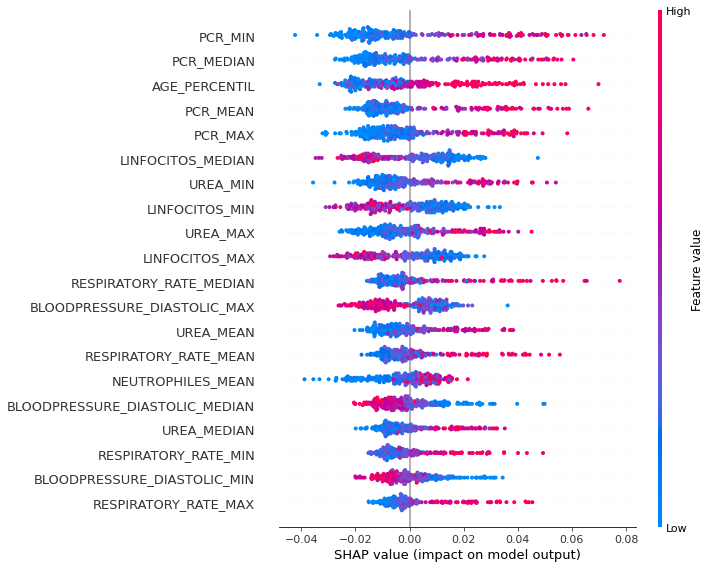

In [50]:
explainer   = shap.TreeExplainer(m)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1], X_train)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred))
    printMetric("Recall",recall_score(y_test, y_pred))
    printMetric("F1Score",f1_score(y_test, y_pred))

print("Train complete")

Evaluating model k-nearesr
	 Accuracy: 0.648
	 Precision: 0.643
	 Recall: 0.545
	 F1Score: 0.59
Evaluating model logis
	 Accuracy: 0.732
	 Precision: 0.75
	 Recall: 0.636
	 F1Score: 0.689
Evaluating model svm-linear
	 Accuracy: 0.634
	 Precision: 0.652
	 Recall: 0.455
	 F1Score: 0.536
Evaluating model svm-rbf
	 Accuracy: 0.662
	 Precision: 0.6
	 Recall: 0.818
	 F1Score: 0.692
Evaluating model randomforest
	 Accuracy: 0.732
	 Precision: 0.733
	 Recall: 0.667
	 F1Score: 0.698
Train complete


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

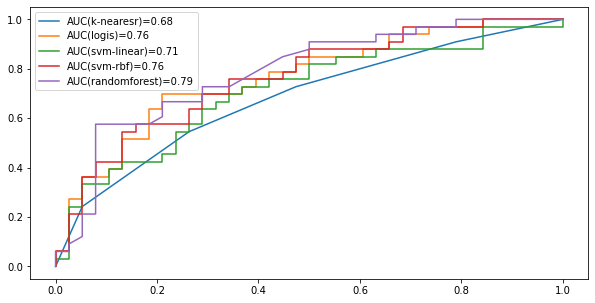

In [54]:
analyzeModels = {
    name:model for name, model in models.items()
}

plt.figure(figsize=(10,5))
aucs = []
for name, model in analyzeModels.items():
    y_scores = model.predict_proba(X_test)
    
    alive_scores = y_scores[:,1]
    
    # Extract AUC score
    auc = roc_auc_score(y_test, alive_scores)
    aucs.append(f"AUC({name})={round(auc,2)}")
    # Extract ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, alive_scores, pos_label=1)
    plt.plot(fpr,tpr)

plt.legend(aucs)

In [55]:
analyzeModels

{'k-nearesr': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'logis': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'svm-linear': CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                 dual=True, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 loss='squared_hinge',
                                                 max_iter=1000,
                                                 multi_class='ovr', penalty='l2',


In [56]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f"({name}) acccuracy={np.mean(scores)}")

(k-nearesr) acccuracy=0.6521428571428571


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scik

(logis) acccuracy=0.7336507936507937


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packag

(svm-linear) acccuracy=0.7
(svm-rbf) acccuracy=0.6059523809523808
(randomforest) acccuracy=0.7393650793650793


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Precision, Recall, F1-Score & Support
#print(classification_report(y_test,y_pred))
# Accuracy Score -> in mutliclass is computed with jaccard_score
#print(accuracy_score(y_test, y_pred))

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"MODEL -> {name}")
    print(classification_report(y_test,y_pred))

MODEL -> k-nearesr
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        38
           1       0.64      0.55      0.59        33

    accuracy                           0.65        71
   macro avg       0.65      0.64      0.64        71
weighted avg       0.65      0.65      0.64        71

MODEL -> logis
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        38
           1       0.75      0.64      0.69        33

    accuracy                           0.73        71
   macro avg       0.74      0.73      0.73        71
weighted avg       0.73      0.73      0.73        71

MODEL -> svm-linear
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        38
           1       0.65      0.45      0.54        33

    accuracy                           0.63        71
   macro avg       0.64      0.62      0.62        71
weighted avg       0

In [58]:
from pycaret.classification import *

In [61]:

SEED = 440
experiment = setup(
    training_data, 
    target='ICU_NEW',
    ignore_features=['PATIENT_VISIT_IDENTIFIER', 'ICU', 'WINDOW'],
    #+lab_columns_to_ignore,
    #fix_imbalance=True, # fixing train-test split imbalances
    #feature_selection=True, feature_selection_threshold=0.95, # conservative important feature selection
    #remove_perfect_collinearity=True, # in case we missed any perfectly collinear features
    session_id=SEED, # seed for reproductibility
    #silent=True # for kaggle compatibility
    )


 
Setup Succesfully Completed!


In [62]:
compare_models()

PyCaret's recommended experiment workflow is to use compare_models() right after setup to evaluate top performing models and finalize a few candidates for continued experimentation. As such, the function that actually allows to you create a model is unimaginatively called create_model(). This function creates a model and scores it using stratified cross-validation. Similar to compare_models(), the output prints a score grid that shows Accuracy, Recall, Precision, F1 and Kappa by fold.

For the remaining part of this tutorial, we will work with the top 5 models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- Extra Trees Classifier('et')
- CatBoost Classifier('catboost')
- Random Forest Classifier('rf')
- Logistic Regression('lr')
- Extreme Gradient Boosting('xgboost')

##### Extra Trees Classifier

In [63]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6800  0.8013  0.5833  0.7000  0.6364  0.3548
1       0.8000  0.8333  0.6667  0.8889  0.7619  0.5955
2       0.8000  0.8205  0.7500  0.8182  0.7826  0.5981
3       0.7200  0.7821  0.6667  0.7273  0.6957  0.4373
4       0.7200  0.8052  0.5455  0.7500  0.6316  0.4147
5       0.6000  0.7240  0.3636  0.5714  0.4444  0.1554
6       0.7600  0.8084  0.7273  0.7273  0.7273  0.5130
7       0.7500  0.7273  0.7273  0.7273  0.7273  0.4965
8       0.7500  0.8007  0.6364  0.7778  0.7000  0.4894
9       0.7083  0.8007  0.7273  0.6667  0.6957  0.4167
Mean    0.7288  0.7904  0.6394  0.7355  0.6803  0.4471
SD      0.0562  0.0348  0.1118  0.0809  0.0907  0.1221

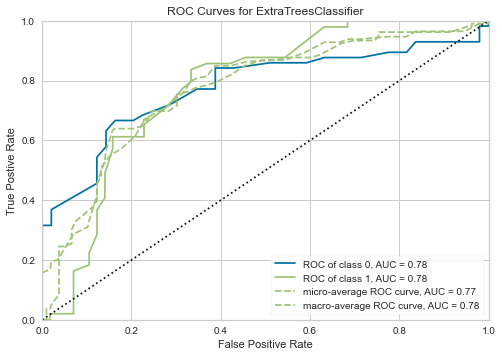

In [64]:
plot_model(et, plot = 'auc')

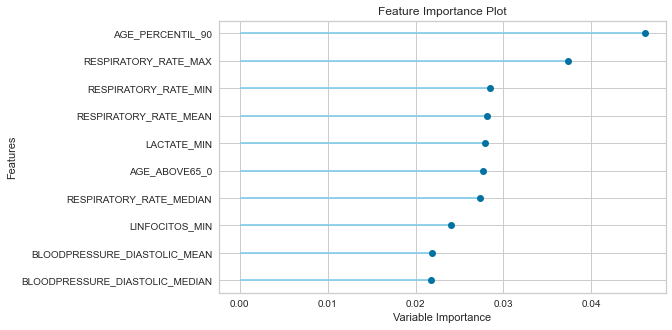

In [65]:
plot_model(et, plot='feature')

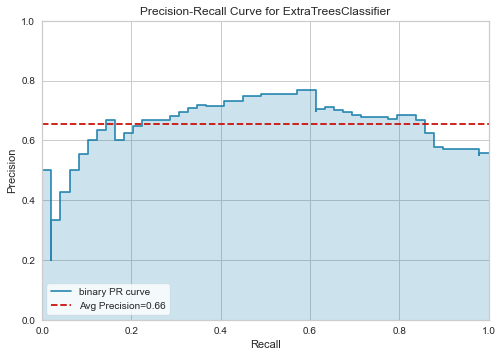

In [66]:
plot_model(et, plot = 'pr')

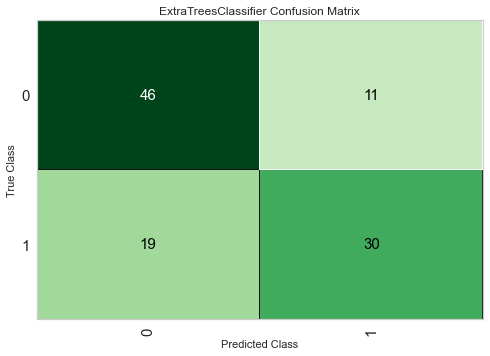

In [67]:
plot_model(et, plot = 'confusion_matrix')

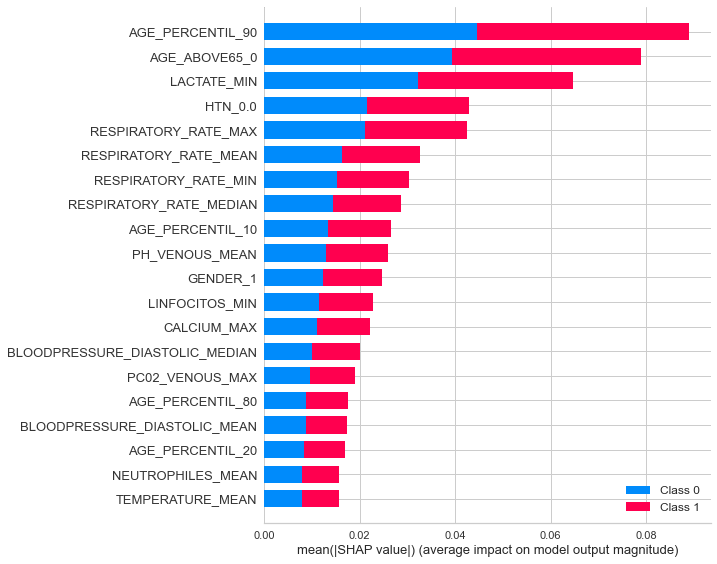

In [68]:
interpret_model(et)

In [69]:
interpret_model(et, plot='reason', observation = 10)

In [70]:
tuned_et = tune_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6800  0.7885  0.5833  0.7000  0.6364  0.3548
1       0.7600  0.8718  0.6667  0.8000  0.7273  0.5161
2       0.7600  0.8141  0.6667  0.8000  0.7273  0.5161
3       0.7600  0.7756  0.6667  0.8000  0.7273  0.5161
4       0.7200  0.7857  0.5455  0.7500  0.6316  0.4147
5       0.6000  0.7143  0.4545  0.5556  0.5000  0.1722
6       0.7200  0.7987  0.5455  0.7500  0.6316  0.4147
7       0.7083  0.7063  0.6364  0.7000  0.6667  0.4085
8       0.6250  0.7483  0.4545  0.6250  0.5263  0.2286
9       0.6667  0.7063  0.6364  0.6364  0.6364  0.3287
Mean    0.7000  0.7710  0.5856  0.7117  0.6411  0.3871
SD      0.0537  0.0504  0.0790  0.0801  0.0750  0.1130

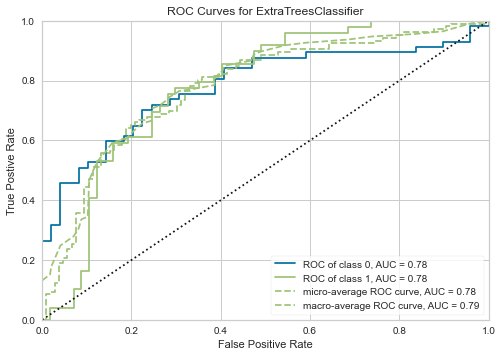

In [71]:
plot_model(tuned_et, plot = 'auc')

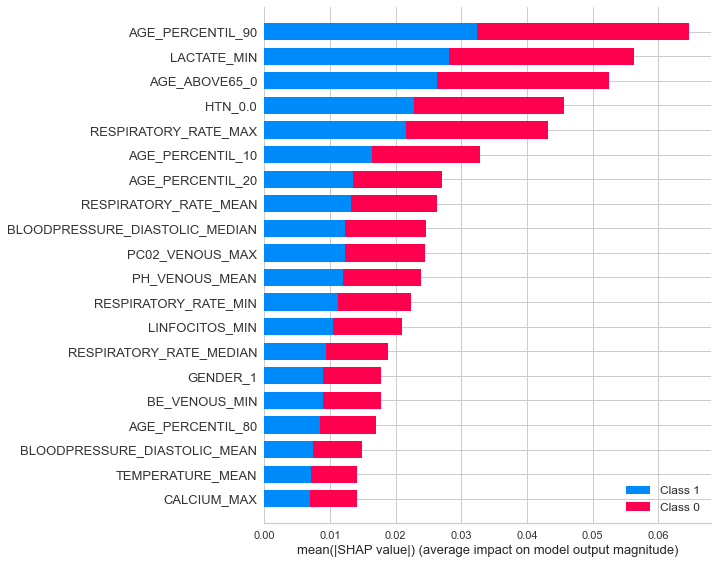

In [72]:
interpret_model(tuned_et)

In [73]:
interpret_model(tuned_et, plot='reason', observation = 10)

In [74]:
predict_model(tuned_et);

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Extra Trees Classifier    0.6981  0.7802  0.6327  0.6889  0.6596  0.3893

In [75]:
final_et = finalize_model(tuned_et)
print(final_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=20, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=115,
                     n_jobs=None, oob_score=False, random_state=440, verbose=0,
                     warm_start=False)


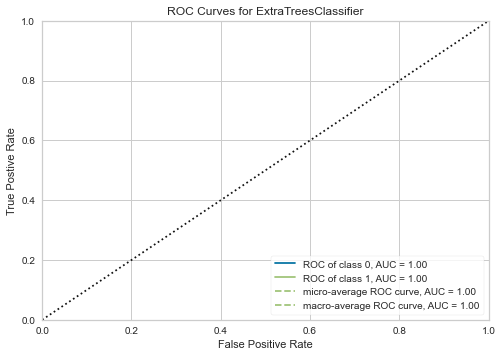

In [76]:
plot_model(final_et, plot = 'auc')

In [77]:
predict_model(final_et);

Model  Accuracy  AUC  Recall  Prec.   F1  Kappa
0  Extra Trees Classifier       1.0  1.0     1.0    1.0  1.0    1.0

##### CatBoost Classifier

In [78]:
catboost = create_model('catboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6800  0.7628  0.5833  0.7000  0.6364  0.3548
1       0.8400  0.8526  0.7500  0.9000  0.8182  0.6774
2       0.7200  0.7949  0.8333  0.6667  0.7407  0.4444
3       0.7200  0.8013  0.5833  0.7778  0.6667  0.4337
4       0.7600  0.8442  0.6364  0.7778  0.7000  0.5033
5       0.6800  0.7597  0.5455  0.6667  0.6000  0.3377
6       0.7200  0.7792  0.8182  0.6429  0.7200  0.4479
7       0.6667  0.7343  0.4545  0.7143  0.5556  0.3094
8       0.6250  0.7692  0.5455  0.6000  0.5714  0.2394
9       0.7500  0.7692  0.6364  0.7778  0.7000  0.4894
Mean    0.7162  0.7867  0.6386  0.7224  0.6709  0.4238
SD      0.0564  0.0355  0.1183  0.0830  0.0775  0.1163

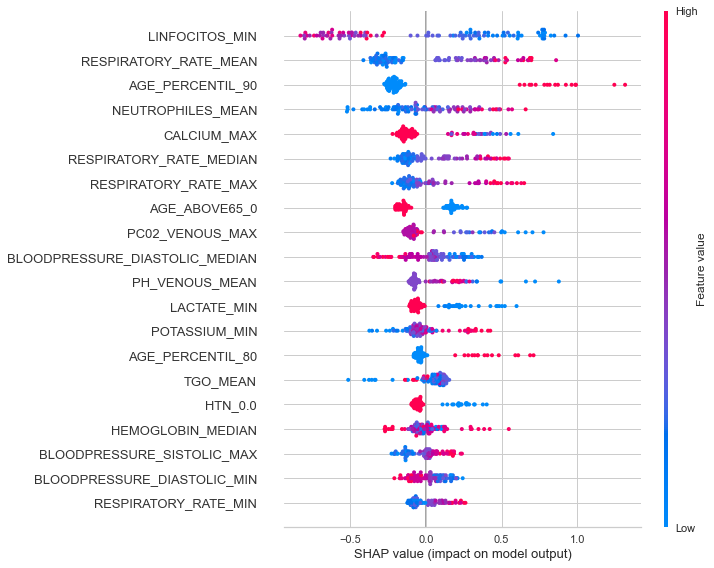

In [79]:
interpret_model(catboost)

In [80]:
interpret_model(catboost, plot='reason', observation = 10)

In [81]:
tuned_catboost = tune_model('catboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6800  0.7949  0.5833  0.7000  0.6364  0.3548
1       0.7200  0.8526  0.5833  0.7778  0.6667  0.4337
2       0.6400  0.7949  0.7500  0.6000  0.6667  0.2857
3       0.7600  0.8205  0.6667  0.8000  0.7273  0.5161
4       0.7600  0.8312  0.6364  0.7778  0.7000  0.5033
5       0.6400  0.7208  0.4545  0.6250  0.5263  0.2475
6       0.7200  0.7857  0.7273  0.6667  0.6957  0.4373
7       0.7083  0.6853  0.5455  0.7500  0.6316  0.4000
8       0.6667  0.7273  0.4545  0.7143  0.5556  0.3094
9       0.7917  0.7692  0.7273  0.8000  0.7619  0.5775
Mean    0.7087  0.7782  0.6129  0.7212  0.6568  0.4065
SD      0.0494  0.0503  0.1024  0.0686  0.0692  0.1021

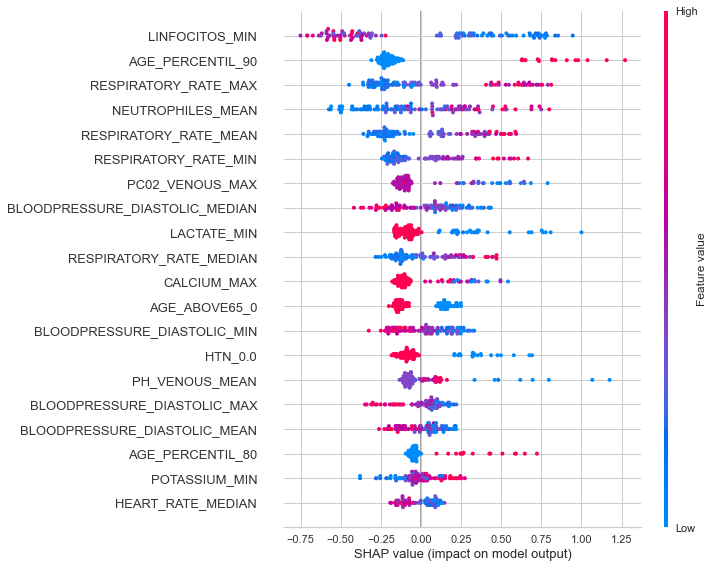

In [82]:
interpret_model(tuned_catboost)

In [83]:
interpret_model(tuned_catboost, plot='reason', observation = 10)

##### Random Forest Classifier

In [84]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8000  0.8846  0.5833  1.0000  0.7368  0.5928
1       0.6400  0.7179  0.5000  0.6667  0.5714  0.2718
2       0.6800  0.7051  0.6667  0.6667  0.6667  0.3590
3       0.6800  0.7692  0.5833  0.7000  0.6364  0.3548
4       0.8000  0.7955  0.6364  0.8750  0.7368  0.5819
5       0.7200  0.7922  0.7273  0.6667  0.6957  0.4373
6       0.7200  0.8149  0.7273  0.6667  0.6957  0.4373
7       0.6667  0.6608  0.5455  0.6667  0.6000  0.3191
8       0.6667  0.7238  0.3636  0.8000  0.5000  0.2993
9       0.6667  0.7762  0.6364  0.6364  0.6364  0.3287
Mean    0.7040  0.7640  0.5970  0.7345  0.6476  0.3982
SD      0.0533  0.0608  0.1043  0.1133  0.0714  0.1072

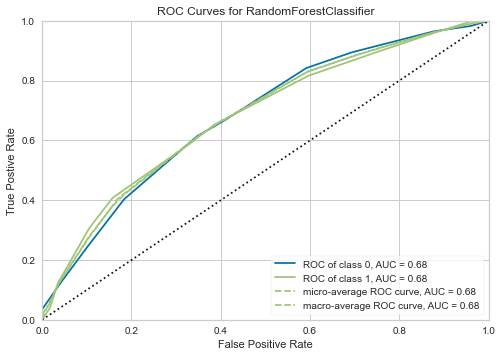

In [85]:
plot_model(rf, plot = 'auc')

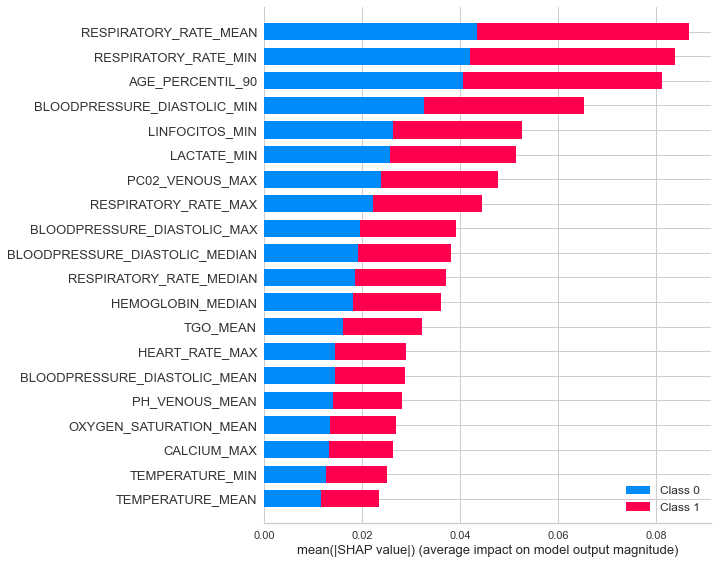

In [86]:
interpret_model(rf)

In [87]:
interpret_model(rf, plot='reason', observation = 10)

In [88]:
tuned_rf = tune_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6400  0.7756  0.5000  0.6667  0.5714  0.2718
1       0.4800  0.7244  0.4167  0.4545  0.4348 -0.0450
2       0.6800  0.7692  0.6667  0.6667  0.6667  0.3590
3       0.7600  0.8333  0.7500  0.7500  0.7500  0.5192
4       0.8000  0.8506  0.7273  0.8000  0.7619  0.5902
5       0.6800  0.7662  0.5455  0.6667  0.6000  0.3377
6       0.6400  0.7338  0.6364  0.5833  0.6087  0.2765
7       0.7500  0.7133  0.5455  0.8571  0.6667  0.4820
8       0.7083  0.7762  0.5455  0.7500  0.6316  0.4000
9       0.6250  0.7343  0.5455  0.6000  0.5714  0.2394
Mean    0.6763  0.7677  0.5879  0.6795  0.6263  0.3431
SD      0.0852  0.0429  0.0993  0.1108  0.0898  0.1690

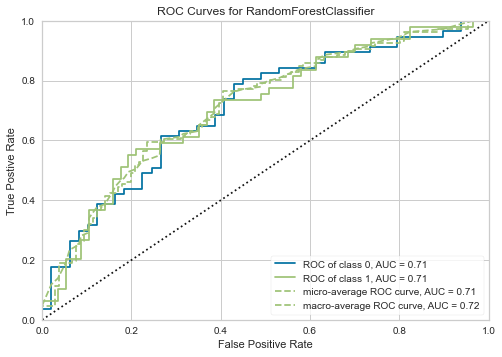

In [89]:
plot_model(tuned_rf, plot = 'auc')

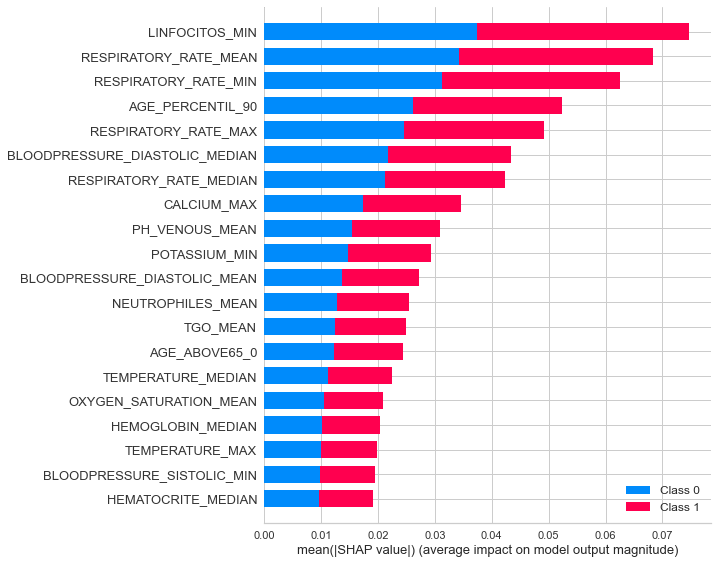

In [90]:
interpret_model(tuned_rf)

In [91]:
interpret_model(tuned_rf, plot='reason', observation = 10)

##### Logistic Regression

In [92]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6800  0.7692  0.6667  0.6667  0.6667  0.3590
1       0.6800  0.7500  0.5833  0.7000  0.6364  0.3548
2       0.7200  0.8013  0.5833  0.7778  0.6667  0.4337
3       0.6400  0.7244  0.5833  0.6364  0.6087  0.2765
4       0.8400  0.7857  0.8182  0.8182  0.8182  0.6753
5       0.7200  0.6364  0.5455  0.7500  0.6316  0.4147
6       0.6800  0.7208  0.4545  0.7143  0.5556  0.3243
7       0.6667  0.6503  0.7273  0.6154  0.6667  0.3379
8       0.6250  0.7203  0.6364  0.5833  0.6087  0.2500
9       0.7083  0.7343  0.5455  0.7500  0.6316  0.4000
Mean    0.6960  0.7293  0.6144  0.7012  0.6491  0.3826
SD      0.0564  0.0505  0.0977  0.0715  0.0650  0.1119

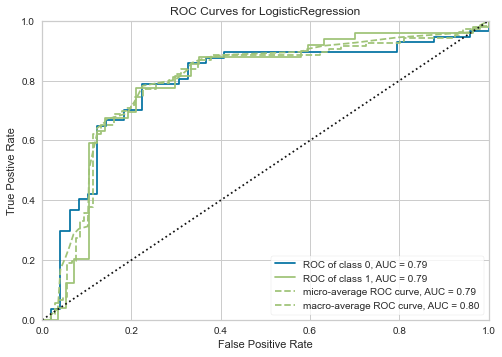

In [93]:
plot_model(lr, plot = 'auc')

In [94]:
interpret_model(lr)

SystemExit: (Type Error): This function only supports tree based models for binary classification.

In [95]:
interpret_model(lr, plot='reason', observation = 10)

SystemExit: (Type Error): This function only supports tree based models for binary classification.

In [96]:
tuned_lr = tune_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6800  0.7436  0.6667  0.6667  0.6667  0.3590
1       0.6800  0.7500  0.5833  0.7000  0.6364  0.3548
2       0.7200  0.8013  0.5833  0.7778  0.6667  0.4337
3       0.6400  0.6987  0.5833  0.6364  0.6087  0.2765
4       0.8400  0.7792  0.8182  0.8182  0.8182  0.6753
5       0.6800  0.6364  0.5455  0.6667  0.6000  0.3377
6       0.6800  0.7143  0.4545  0.7143  0.5556  0.3243
7       0.6667  0.6364  0.7273  0.6154  0.6667  0.3379
8       0.6250  0.7133  0.6364  0.5833  0.6087  0.2500
9       0.7083  0.7343  0.5455  0.7500  0.6316  0.4000
Mean    0.6920  0.7207  0.6144  0.6929  0.6459  0.3749
SD      0.0560  0.0513  0.0977  0.0702  0.0666  0.1121

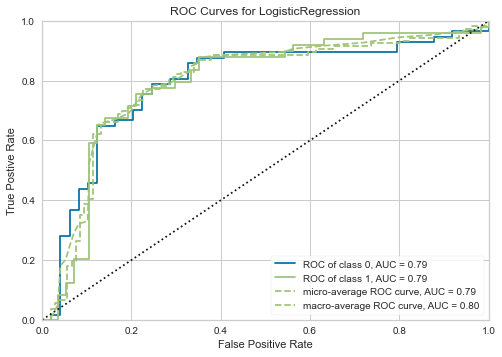

In [97]:
plot_model(tuned_lr, plot = 'auc')

In [98]:
interpret_model(tuned_lr)

SystemExit: (Type Error): This function only supports tree based models for binary classification.

In [99]:
interpret_model(tuned_lr, plot='reason', observation = 10)

SystemExit: (Type Error): This function only supports tree based models for binary classification.

##### Extreme Gradient Boosting

In [100]:
xgboost = create_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6800  0.7885  0.5000  0.7500  0.6000  0.3506
1       0.8000  0.8397  0.7500  0.8182  0.7826  0.5981
2       0.7200  0.7885  0.7500  0.6923  0.7200  0.4409
3       0.7200  0.7756  0.5833  0.7778  0.6667  0.4337
4       0.7600  0.8636  0.6364  0.7778  0.7000  0.5033
5       0.6400  0.7922  0.5455  0.6000  0.5714  0.2623
6       0.6400  0.7338  0.6364  0.5833  0.6087  0.2765
7       0.6667  0.7552  0.5455  0.6667  0.6000  0.3191
8       0.7083  0.7762  0.5455  0.7500  0.6316  0.4000
9       0.6250  0.6713  0.7273  0.5714  0.6400  0.2603
Mean    0.6960  0.7785  0.6220  0.6987  0.6521  0.3845
SD      0.0535  0.0504  0.0884  0.0851  0.0621  0.1063

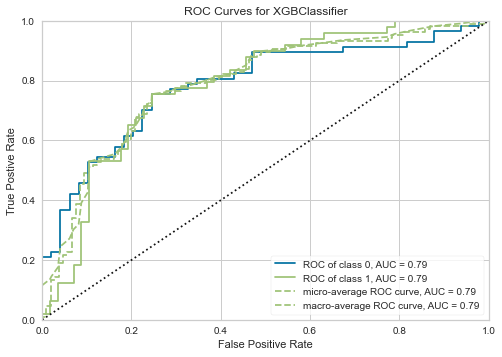

In [111]:
plot_model(xgboost, plot = 'auc')

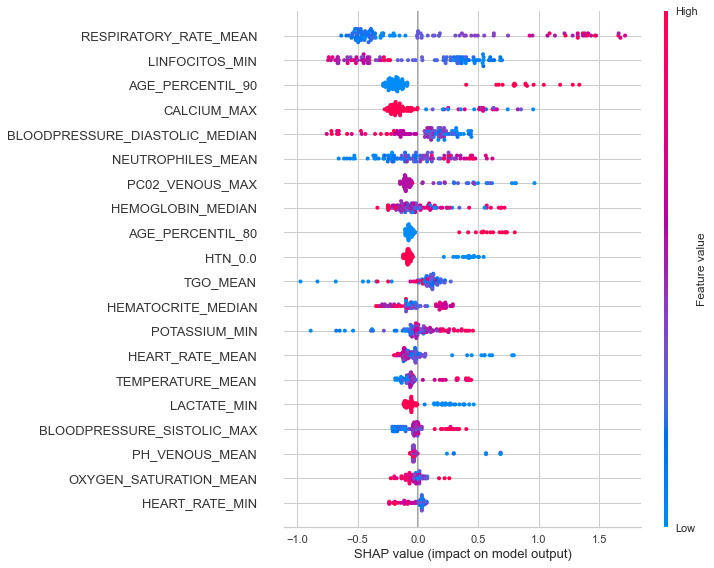

In [102]:
interpret_model(xgboost)

In [103]:
interpret_model(xgboost, plot='reason', observation = 10)

In [120]:
tuned_xgboost = tune_model('xgboost',n_iter=15)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6800  0.7756  0.5000  0.7500  0.6000  0.3506
1       0.6800  0.7500  0.6667  0.6667  0.6667  0.3590
2       0.6400  0.8333  0.6667  0.6154  0.6400  0.2812
3       0.6400  0.7436  0.5000  0.6667  0.5714  0.2718
4       0.8000  0.8571  0.7273  0.8000  0.7619  0.5902
5       0.6800  0.7597  0.5455  0.6667  0.6000  0.3377
6       0.6400  0.7532  0.6364  0.5833  0.6087  0.2765
7       0.5833  0.6084  0.4545  0.5556  0.5000  0.1489
8       0.6667  0.7063  0.5455  0.6667  0.6000  0.3191
9       0.7083  0.7203  0.7273  0.6667  0.6957  0.4167
Mean    0.6718  0.7508  0.5970  0.6638  0.6244  0.3352
SD      0.0537  0.0649  0.0947  0.0682  0.0681  0.1085

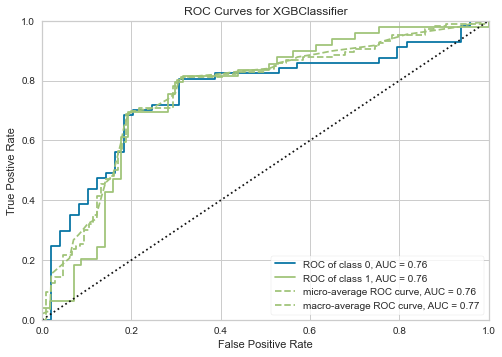

In [121]:
plot_model(tuned_xgboost, plot = 'auc')

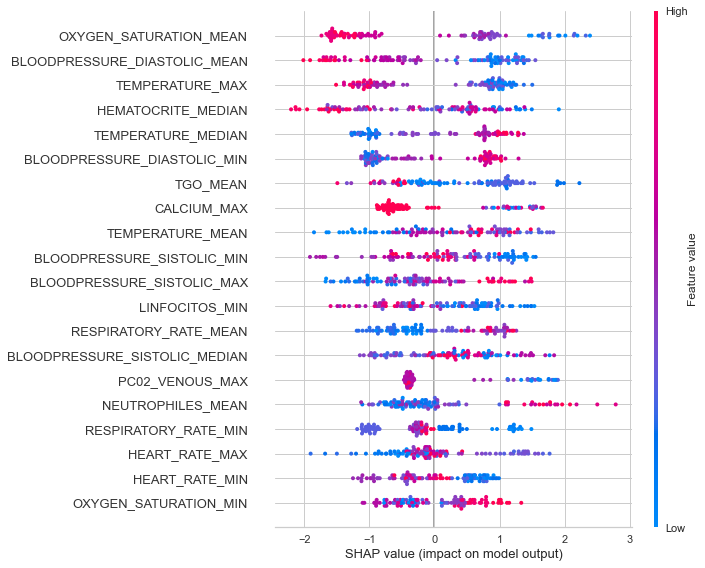

In [106]:
interpret_model(tuned_xgboost)

In [107]:
interpret_model(tuned_xgboost, plot='reason', observation = 10)